# NBA Hall of Fame Final Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
import warnings
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

## Data Import

In [2]:
nba = pd.read_csv("data/Seasons_Stats.csv", index_col = 0)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Data Cleaning

#### Cleaning the NBA Dataframe

In [3]:
nba['Year'] = np.where((nba['Year'].isna()), 1950, nba['Year'])
nba['Age'] = np.where((nba['Age'].isna()), nba['Age'].mean(), nba['Age'])

In [4]:
# Players here are indexes where they are broken down by year played, as well as team played for
integer_types = ['Year', 'Age']

nba[integer_types] = nba[integer_types].astype(int)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Feature Engineering

#### Reading in Separate Dataframe to Capture NBA Champions

In [5]:
champs = pd.read_csv("data/champions.csv")
champs.head()

,Year,League,Champion,Tm,Runner_Up,Runner_Up_Code
0,2020,NBA,Los Angeles Lakers,LAL,Miami Heat,LAL
1,2019,NBA,Toronto Raptors,TOR,Golden State Warriors,TOR
2,2018,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
3,2017,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
4,2016,NBA,Cleveland Cavaliers,CLE,Golden State Warriors,CLE


#### Reading in Separate Dataframe to Capture NBA All-Stars

In [6]:
all_stars = pd.read_csv("data/all_stars.csv", encoding='latin-1')
all_stars.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,MP.1,PTS.1,TRB.1,AST.1
0,Kareem Abdul-Jabbar,18,13.0,449.0,105,213,0.493,0.0,1.0,0.000,105,212,0.495,41,50,0.820,33.0,84.0,149,51,6.0,31.0,28.0,57,251,NaN,24.9,13.9,8.3,2.8
1,LeBron James,17,17.0,473.0,161,310,0.519,38.0,119.0,0.319,123,191,0.644,29,40,0.725,13.0,90.0,103,98,19.0,7.0,55.0,18,389,NaN,27.8,22.9,6.1,5.8
2,Kobe Bryant,15,15.0,415.0,119,238,0.500,22.0,68.0,0.324,97,170,0.571,30,38,0.789,28.0,47.0,75,70,38.0,6.0,35.0,35,290,NaN,27.7,19.3,5.0,4.7
3,Tim Duncan,15,12.0,311.0,63,115,0.548,1.0,4.0,0.250,62,111,0.559,13,17,0.765,38.0,98.0,136,31,13.0,8.0,31.0,16,140,NaN,20.7,9.3,9.1,2.1
4,Kevin Garnett,14,11.0,287.0,72,141,0.511,0.0,4.0,0.000,72,137,0.526,14,16,0.875,25.0,63.0,88,40,16.0,11.0,20.0,10,158,NaN,20.5,11.3,6.3,2.9


In [7]:
all_stars_new = all_stars[['Player', 'G']]

#### Reading in Player Data for Supplementary Statistics

In [8]:
player_data = pd.read_csv("data/player_data.csv")
player_data.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,10-Jun,240.0,24-Jun-68,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,9-Jun,235.0,7-Apr-46,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2-Jul,225.0,16-Apr-47,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1-Jun,162.0,9-Mar-69,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-Jun,223.0,3-Nov-74,San Jose State University


#### Calculating Number of NBA Seasons Played

In [9]:
player_data['seasons'] = player_data['year_end'] - player_data['year_start']
player_data.head()

,Player,year_start,year_end,position,height,weight,birth_date,college,seasons
0,Alaa Abdelnaby,1991,1995,F-C,10-Jun,240.0,24-Jun-68,Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,9-Jun,235.0,7-Apr-46,Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,2-Jul,225.0,16-Apr-47,"University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,1-Jun,162.0,9-Mar-69,Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-Jun,223.0,3-Nov-74,San Jose State University,5


#### Creating Year Retired for Players

In [10]:
player_data_retired = player_data[['Player', 'year_end']]

#### Reading in MVP Dataframe

In [11]:
nba_mvp = pd.read_csv("data/mvp_agg.csv")
nba_mvp.head()

,Player,MVP
0,Kareem Abdul-Jabbar,6
1,Michael Jordan,5
2,Bill Russell,5
3,Wilt Chamberlain,4
4,LeBron James,4


#### Reading Defensive Player of the Year Data

In [12]:
nba_dpoy = pd.read_csv("data/dpoy.csv")
nba_dpoy.head()

,Player,DPOY
0,Dikembe Mutombo,4
1,Ben Wallace,4
2,Dwight Howard,3
3,Mark Eaton,2
4,Rudy Gobert,2


#### Reading in Finals MVP Data

In [13]:
finals_mvp = pd.read_csv("data/finals_mvp.csv")
finals_mvp.head()

,Player,Finals_MVP
0,Michael Jordan,6
1,LeBron James,4
2,Tim Duncan,3
3,Magic Johnson,3
4,Shaquille O'Neal,3


### Modifying Indexes for Comparing Datasets

#### Removing Total Index Values

In [14]:
nba = nba[nba.Tm != 'TOT']

#### Generating Hall of Fame Categorical Target Variable

In [15]:
nba['HOF'] = [1 if x == True else 0 for x in nba['Player'].str.endswith('*')]

In [16]:
nba['HOF'].value_counts()

0    21082
1     1486
Name: HOF, dtype: int64

#### Adding Categorical Variables for Championship Teams & All Star Appearances

In [17]:
nba['concat'] = nba['Year'].astype(str) + nba['Tm']
champs['concat'] = champs['Year'].astype(str) + champs['Tm']
champs['runner_up'] = champs['Year'].astype(str) + champs['Runner_Up_Code']

nba['champ'] = nba['concat'].isin(champs['concat']).astype(int)
nba['runner_up'] = nba['concat'].isin(champs['runner_up']).astype(int)

nba['all_star'] = nba['Player'].isin(all_stars['Player']).astype(int)
nba['teams'] = nba.groupby('Player')['Tm'].transform('count')
nba['Player'] = nba['Player'].str.replace('*', '')
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star,teams
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,1950FTW,0,0,0,2.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,0,1950INO,0,0,0,3.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,0,1950CHS,0,0,1,4.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,0,1950DNN,0,0,0,3.0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.250,NaN,NaN,NaN,1.0,4.0,0.250,0.250,2.0,3.0,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,0,1950NYK,0,0,0,3.0


### Group Dataframe by Player Name

In [18]:
nba_total = nba.groupby(['Player', 'Year']).agg({'PTS': ['sum'], 'AST': ['sum'], 'TOV': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'],'TRB': ['sum'], 'BLK': ['sum'], 'STL': ['sum'], 'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'PF': ['sum'], 'HOF': ['sum'], 'champ': ['sum'], 'runner_up': ['sum']})
nba_total.columns = ['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up']
nba_total = nba_total.reset_index()
nba_total.head()

,Player,Year,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up
0,A.C. Green,1986,521.0,54.0,99.0,160.0,221.0,381.0,49.0,49.0,82.0,1.0,1542.0,209.0,388.0,1.0,6.0,102.0,167.0,229.0,0,0,0
1,A.C. Green,1987,852.0,84.0,102.0,210.0,405.0,615.0,80.0,70.0,79.0,72.0,2240.0,316.0,587.0,0.0,5.0,220.0,282.0,171.0,0,1,0
2,A.C. Green,1988,937.0,93.0,120.0,245.0,465.0,710.0,45.0,87.0,82.0,64.0,2636.0,322.0,640.0,0.0,2.0,293.0,379.0,204.0,0,1,0
3,A.C. Green,1989,1088.0,103.0,119.0,258.0,481.0,739.0,55.0,94.0,82.0,82.0,2510.0,401.0,758.0,4.0,17.0,282.0,359.0,172.0,0,0,1
4,A.C. Green,1990,1061.0,90.0,116.0,262.0,450.0,712.0,50.0,66.0,82.0,82.0,2709.0,385.0,806.0,13.0,46.0,278.0,370.0,207.0,0,0,0


#### Adding Years in the League Variable before Reshaping Dataframe

In [19]:
nba_total['yrs_in_lg'] = np.where((nba_total['Year'] >= 1950), 1, 0)

#### Reshaping Dataframe by Groupby to Eliminate Duplicate Years

In [20]:
nba_total = nba_total.groupby(['Player'], dropna = False)[['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up', 'yrs_in_lg']].sum().reset_index()
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1


#### Adding Teams Played for by Player

In [21]:
nba_slice = nba.groupby('Player')['teams'].mean()
nba_total = pd.merge(nba_total, nba_slice, on = 'Player', how = 'left')

#### Adding MVP Winners

In [22]:
nba_total = pd.merge(nba_total, nba_mvp, on = 'Player', how = 'left')

#### Adding DPOY Winners

In [23]:
nba_total = pd.merge(nba_total, nba_dpoy, on = 'Player', how = 'left')

#### Adding Finals MVP Winners

In [24]:
nba_total = pd.merge(nba_total, finals_mvp, on = 'Player', how = 'left')

#### Adding Retired Players Final Year

In [25]:
nba_total = pd.merge(nba_total, player_data_retired, on = 'Player', how = 'left')
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,17.0,NaN,NaN,NaN,2001.0
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1.0,NaN,NaN,NaN,2000.0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,2.0,NaN,NaN,NaN,1992.0
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,3.0,NaN,NaN,NaN,2003.0
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,1.0,NaN,NaN,NaN,2017.0


#### Bringing in All Star Totals for players

In [26]:
nba_total = pd.merge(nba_total, all_stars_new, on = 'Player', how = 'left')

# Cleaning up dataframe column headers
nba_total.rename(columns = {'G_y':'all_star_app'}, inplace = True)

### Creating In-Game Statistics

#### Creating Per-Game Stats

In [27]:
nba_total['PPG'] = nba_total.PTS/nba_total.G_x
nba_total['APG'] = nba_total.AST/nba_total.G_x
nba_total['RPG'] = nba_total.TRB/nba_total.G_x
nba_total['BPG'] = nba_total.BLK/nba_total.G_x
nba_total['SPG'] = nba_total.STL/nba_total.G_x
nba_total['TPG'] = nba_total.TOV/nba_total.G_x
nba_total['3PG'] = nba_total['3P']/nba_total.G_x
nba_total['FG%'] = nba_total.FG/nba_total.FGA
nba_total['3P%'] = nba_total['3P']/nba_total['3PA']
nba_total['FT%'] = nba_total.FT/nba_total.FTA

#### Adding Advanced Statistics

In [28]:
# Take advanced statistics out of dataframe so that they aren't affected by seasonal totals
advanced_stats = nba.groupby('Player', dropna = False)['USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'TS%', 'PER', 'eFG%'].mean()

#### Merging Advanced Stats on Main Dataframe

In [29]:
nba_total = pd.merge(nba_total, advanced_stats, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_x':'Games'}, inplace = True)

### Creating New Feature Columns

In [30]:
# Fixing HOF totals
nba_total['HOF'] = np.where((nba_total['HOF'] >= 1), 1, 0)

# Adding Players Qualified for the HOF
nba_total['HOF_Q'] = np.where((nba_total['year_end'] >= 2013), 0, 1)

# Fixing HOF Qualified totals
nba_total['HOF_Q'] = np.where((nba_total['HOF_Q'] >= 1), 1, 0)

# Fixing MVP NaN Values
nba_total['MVP'].fillna(0, inplace = True)

# Fixing DPOY NaN Values
nba_total['DPOY'].fillna(0, inplace = True)

# Fixing Finals MVP NaN Values
nba_total['Finals_MVP'].fillna(0, inplace = True)

# Variable for finals appearances
nba_total['finals_app'] = nba_total['champ'] + nba_total['runner_up']

# Dealing with NaN values in all-star appearances
nba_total['all_star_app'].fillna(0, inplace = True)

# Removing the outlier Eddie Johnson
nba_total = nba_total[nba_total['Player'] != 'Eddie Johnson']

# 20 & 5 Players
nba_total['20/5'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 5) & (nba_total['RPG'] >= 5), 1, 0)

# 20 & 10 Players - Assists
nba_total['20/10_A'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 10), 1, 0)

# 20 & 10 Players - Rebounds
nba_total['20/10_B'] = np.where((nba_total['PPG'] >= 20) & (nba_total['RPG'] >= 10), 1, 0)

# Title winning All Stars
nba_total['title_star'] = np.where((nba_total['champ'] >= 1) & (nba_total['all_star_app'] >= 1), 1, 0)

# All-time leaders in points
nba_total['leader_pts'] = np.where((nba_total['PTS'] >= 20_000), 1, 0)

# All-time leaders in rebounds
nba_total['leader_reb'] = np.where((nba_total['TRB'] >= 10_000), 1, 0)

# All-time leaders in assists
nba_total['leader_ast'] = np.where((nba_total['AST'] >= 6_000), 1, 0)

# All-time leaders in freethrows
nba_total['leader_ft'] = np.where((nba_total['FT'] >= 5_000), 1, 0)

# All-time leaders in freethrow percentage
nba_total['leader_ft%'] = np.where((nba_total['FT%'] >= 0.75), 1, 0)

## EDA

#### Splitting Dataframe Between Players Eligible & Not for HOF

In [31]:
nba_retired = nba_total[nba_total['HOF_Q'] == 1]

In [32]:
nba_active = nba_total[nba_total['HOF_Q'] == 0]

#### Correlation Matrix

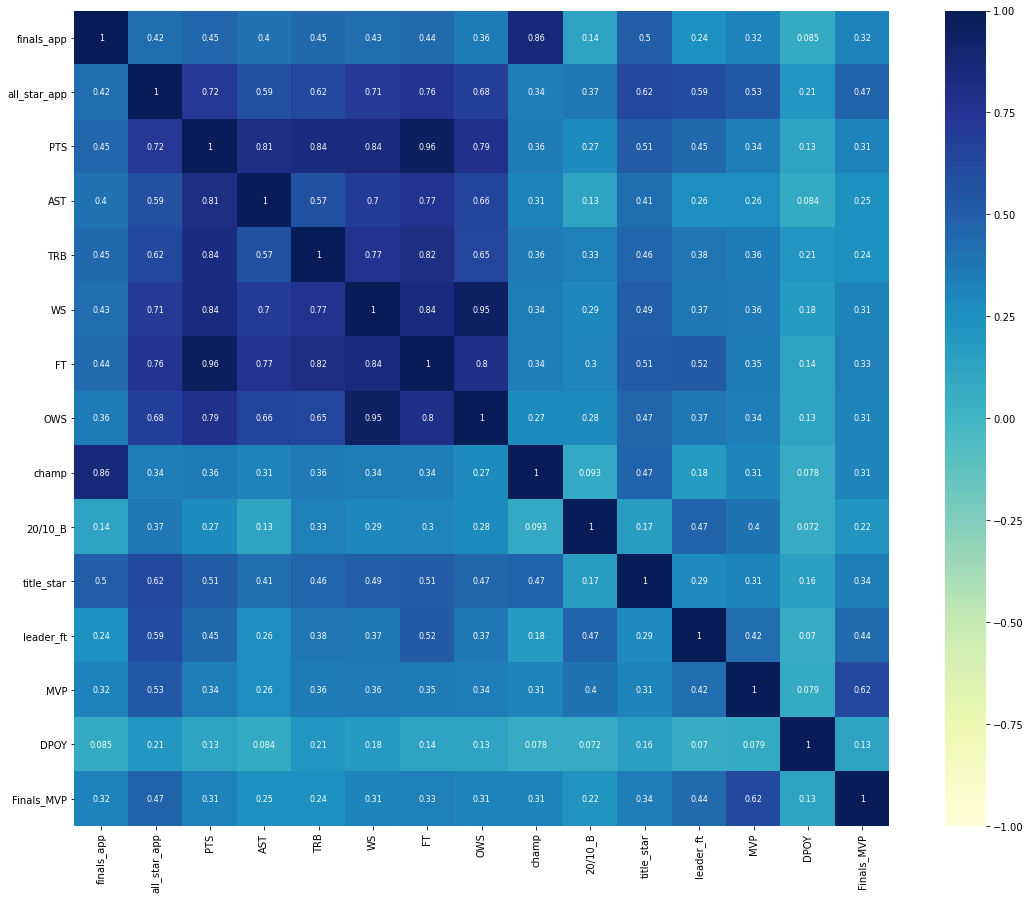

In [34]:
correlation_features = ['finals_app', 'all_star_app', 'PTS', 'AST', 'TRB', 'WS', 'FT', 'OWS', 'champ', '20/10_B',\
                        'title_star', 'leader_ft', 'MVP', 'DPOY', 'Finals_MVP']


nba_corr = nba_total[correlation_features].corr()
plt.subplots(figsize=(20,15))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

#### Takeaways

- FG & PTS highly correlated
    - Remove FG <br><br>
- FT & Points highly correlated
    - Remove PTS <br><br>
- OWS & WS highly correlated
    - Remove OWS <br><br>

#### Stat Correlation Bar Chart with HOF Players

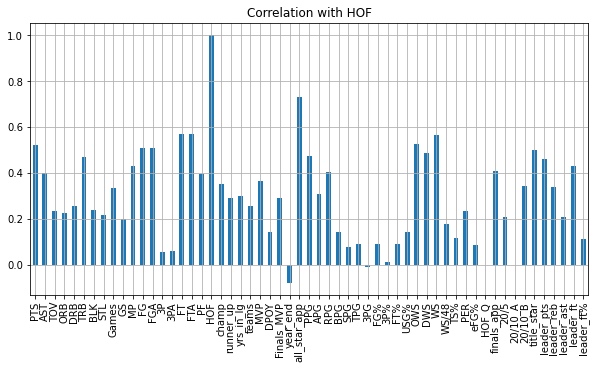

In [35]:
nba_retired.corrwith(nba_retired.HOF).plot.bar(figsize = (10, 5), title = "Correlation with HOF", 
                                        fontsize = 10,rot = 90, grid = True);

#### Takeaways

- All-Star Appearances, Win-Share, Points, Free-Throws great correlation with Hall of Fame
- Leaders in Points, Title-Stars, Leader in Free-Throws, and 20/10 players (pts & rebounds) good featured columns that were created


#### PPG by HOF's

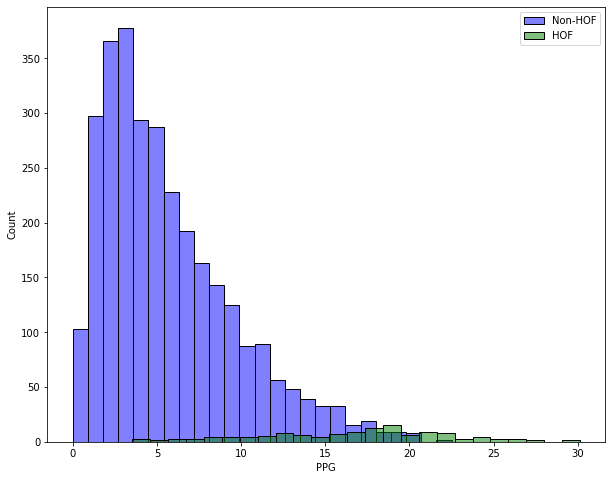

In [36]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_retired[nba_retired['HOF'] == 0].PPG, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_retired[nba_retired['HOF'] == 1].PPG, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

#### Points Scored vs PER

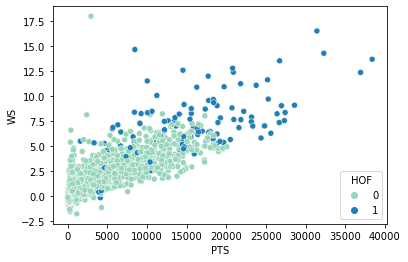

In [105]:
fig, ax = plt.subplots()
sns.scatterplot(x = nba_retired.PTS, y = nba_retired.WS, hue = nba_retired['HOF'], palette = 'YlGnBu')
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');
#plt.savefig('HOF_PTS_OWS2');

#### 3D Plot of Win-Share, Free-Throws, and All-Star Appearances

In [106]:
fig = px.scatter_3d(nba_retired, x='all_star_app', y='WS', z='FT', color='HOF', size_max=18, opacity=0.6,\
                   color_continuous_scale='inferno')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

#### 3D NBA Player Overlap of All-Stars, Champions, and Point Totals

In [40]:
fig = px.scatter_3d(nba_retired, x='all_star_app', y='champ', z='PTS', color='HOF', size_max=18, opacity=0.6,\
                   color_continuous_scale='YlGnBu')fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### Average Win Share for HOF's

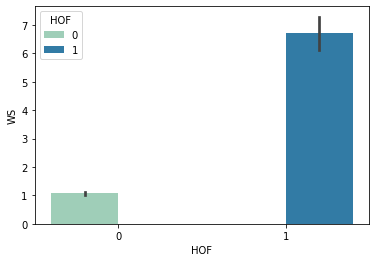

In [42]:
sns.barplot(x = nba_retired.HOF, y = nba_retired.WS, hue = nba_retired.HOF, palette = 'YlGnBu');

#### Finals Appearances of HOF's

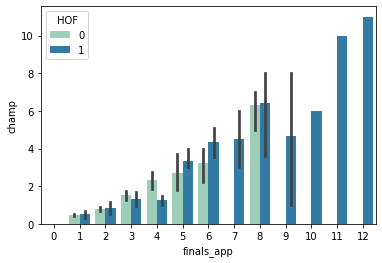

In [43]:
sns.barplot(x = nba_retired.finals_app, y = nba_retired.champ, hue = nba_retired.HOF, palette = 'YlGnBu');

#### Games Played vs HOF

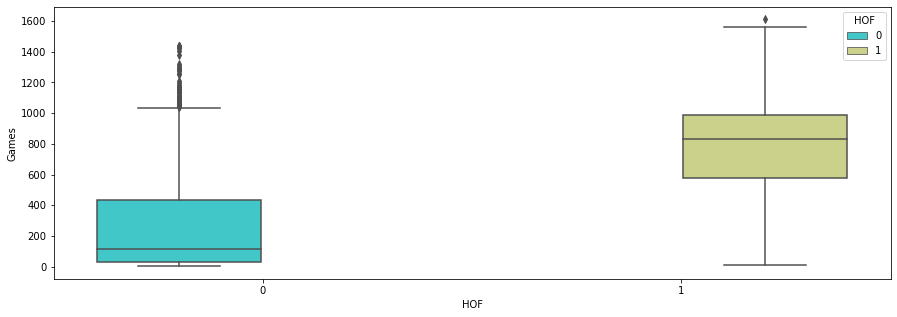

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(data = nba_retired, x = 'HOF', y = 'Games', hue = 'HOF', palette = "rainbow");

## Building Preliminary Model

#### Getting Categorical Variables

In [45]:
# Best features to include for preliminary models based on EDA, feature engineering, and feature interactions
feature_cols = ['finals_app', 'all_star_app', 'AST', 'TRB', 'WS', 'FT', 'title_star', '20/10_B', 'leader_pts', 'champ', 'MVP', 'DPOY', 'Finals_MVP']

In [46]:
# Creating our variables prior to the train-test split
y = nba_retired['HOF']

X = nba_retired[feature_cols]

In [47]:
# Taking care of NaN values in the dataframe
X.fillna(0, inplace = True)

#### Train Test Split the Data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [49]:
# Scaling the continuous variables
nba_scaled = StandardScaler()

nba_scaled.fit(X_train)
X_train_sc = pd.DataFrame(nba_scaled.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(nba_scaled.transform(X_test), index = X_test.index, columns = X_test.columns)

### Logistic Regression Model

In [50]:
logreg_model = LogisticRegression(random_state = 42, solver = 'liblinear', C = .1, class_weight = 'balanced')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [51]:
cross_val_score(logreg_model, X_train, y_train, cv=3)

array([0.95558376, 0.93654822, 0.94416244])

In [52]:
y_pred_lr = logreg_model.predict(X_test)

In [53]:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

results = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636


#### Logistic Regression Confusion Matrix Plot

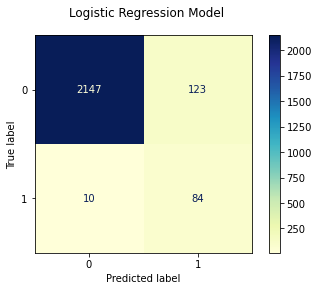

In [54]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(logreg_model, X_train, y_train, ax=ax, cmap="YlGnBu");

### KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(weights='distance')

In [56]:
cross_val_score(knn, X_train_sc, y_train, cv=5)

array([0.97463002, 0.97463002, 0.97885835, 0.96828753, 0.97881356])

In [57]:
y_pred_knn = knn.predict(X_test_sc)

In [58]:
knn_proba = knn.predict_proba(X_test_sc)[:, 1]

In [59]:
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

knn_model = pd.DataFrame([['KNN', acc_knn, prec_knn, rec_knn, f1_knn]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(knn_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754


#### KNN Model Confusion Matrix Plot

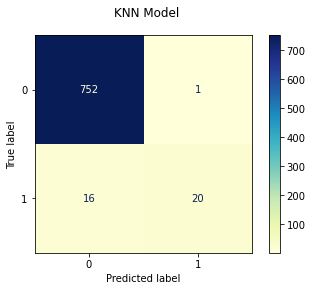

In [103]:
fig, ax = plt.subplots()

fig.suptitle("KNN Model")

plot_confusion_matrix(knn, X_test_sc, y_test, ax=ax, cmap="YlGnBu");
#plt.savefig('KNN_CM.png')

### Decision Tree

In [61]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_train_pred_dt = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

In [63]:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

dt_model = pd.DataFrame([['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(dt_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364


### XGBoost

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_train_pred_xg = xgb.predict(X_train)
y_pred_xg = xgb.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred_xg)

In [67]:
acc_xg = accuracy_score(y_test, y_pred_xg)
prec_xg = precision_score(y_test, y_pred_xg)
rec_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)

xgb_model = pd.DataFrame([['XGBoost', acc_xg, prec_xg, rec_xg, f1_xg]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(xgb_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462


### RFE Model

In [68]:
rfe_features = ['finals_app', 'all_star_app', 'WS', 'AST', 'TRB', 'FT', 'title_star', '20/10_B', 'leader_pts', 'champ', 'MVP', 'DPOY', 'Finals_MVP']

In [69]:
rfe_lr = LogisticRegression(class_weight = 'balanced', C = .1)
 
selector = RFECV(estimator = rfe_lr, step = 1, cv = 5 , scoring = 'f1', n_jobs = -1, verbose = 1)

selector.fit(X_train[rfe_features], y_train) 

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFECV(cv=5, estimator=LogisticRegression(C=0.1, class_weight='balanced'),
      n_jobs=-1, scoring='f1', verbose=1)

In [70]:
selected_rfe = X_train[rfe_features].columns[selector.support_]
removed_rfe = X_train[rfe_features].columns[~selector.support_]

In [71]:
len(selected_rfe)

3

In [72]:
removed_rfe

Index(['finals_app', 'AST', 'TRB', 'FT', 'title_star', '20/10_B', 'leader_pts',
       'champ', 'DPOY', 'Finals_MVP'],
      dtype='object')

In [73]:
selected_rfe

Index(['all_star_app', 'WS', 'MVP'], dtype='object')

In [74]:
cross_val_score(rfe_lr, X_train, y_train, cv=5)

array([0.95348837, 0.93657505, 0.94291755, 0.92811839, 0.9470339 ])

In [75]:
#instantiate a logistic regression object
lm_rfe = LogisticRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = lm_rfe.predict(X_train[selected_rfe])

In [76]:
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])
y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

In [77]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

rfe_model = pd.DataFrame([['RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfe_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333


In [78]:
# Looking at the selected features' coefficients
pd.DataFrame({"Coefficients": lm_rfe.coef_.reshape((-1))}, index=selected_rfe)

,Coefficients
all_star_app,0.699528
WS,0.358745
MVP,2.213611


In [79]:
nba_retired[selected_rfe].corr()

,all_star_app,WS,MVP
all_star_app,1.000000,0.716413,0.522605
WS,0.716413,1.000000,0.362974
MVP,0.522605,0.362974,1.000000


#### Confusion Matrix on RFE Test Data

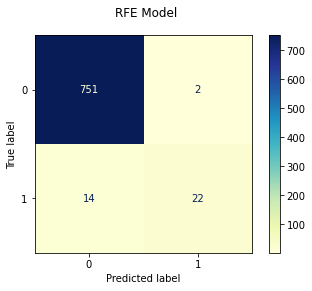

In [80]:
fig, ax = plt.subplots()

fig.suptitle("RFE Model")

plot_confusion_matrix(lm_rfe, X_test[selected_rfe], y_test, ax=ax, cmap="YlGnBu");

### Grid Search

In [81]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

logistic = LogisticRegression(class_weight = 'balanced')

gs_lr = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [82]:
gs_lr.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [83]:
gs_lr.best_estimator_.coef_

array([[ 4.35689637e-01,  1.02941880e+00, -3.46813463e-04,
        -2.78301145e-04,  8.76937367e-01, -3.56540231e-04,
         8.34617180e-02,  7.78622454e-02,  7.92098559e-02,
         1.34457992e-01,  5.41577297e-01,  1.00185351e-02,
         1.24278285e-01]])

In [84]:
pd.DataFrame({"Coefficients": gs_lr.best_estimator_.coef_.reshape((-1))}, index=X_train.columns)

,Coefficients
finals_app,0.435690
all_star_app,1.029419
AST,-0.000347
TRB,-0.000278
WS,0.876937
FT,-0.000357
title_star,0.083462
20/10_B,0.077862
leader_pts,0.079210
champ,0.134458


### Decision Tree Grid Search

In [85]:
gs_dt = DecisionTreeClassifier(class_weight = 'balanced')

params_grid ={
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 3, 2],
    'min_samples_split': [2,10,20]
}

gridsearch_model = GridSearchCV(estimator = gs_dt, param_grid = params_grid, scoring = 'recall')

gridsearch_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3, 2],
                         'min_samples_split': [2, 10, 20]},
             scoring='recall')

In [86]:
y_pred_gs_dt = gridsearch_model.predict(X_test)

In [87]:
best_model = gridsearch_model.best_estimator_
best_model.score(X_test, y_test)

acc_gs_dt = accuracy_score(y_test, y_pred_gs_dt)
prec_gs_dt = precision_score(y_test, y_pred_gs_dt)
rec_gs_dt = recall_score(y_test, y_pred_gs_dt)
f1_gs_dt = f1_score(y_test, y_pred_gs_dt)

gs_model = pd.DataFrame([['Best GS-DT', acc_gs_dt, prec_gs_dt, rec_gs_dt, f1_gs_dt]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(gs_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241


### Random Forest

In [88]:
rfr = RandomForestClassifier(n_estimators = 100, max_samples=0.5, random_state=42, class_weight = 'balanced')

rfr.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=0.5,
                       random_state=42)

In [89]:
scores = cross_val_score(estimator=rfr, X=X_train,
               y=y_train, cv=5)
scores

array([0.97674419, 0.97251586, 0.98097252, 0.96828753, 0.97881356])

In [90]:
y_train_pred_rfr = rfr.predict(X_train)
y_test_pred_rfr = rfr.predict(X_test)

In [91]:
acc_rfr_tr = accuracy_score(y_train, y_train_pred_rfr)
prec_rfr_tr = precision_score(y_train, y_train_pred_rfr)
rec_rfr_tr = recall_score(y_train, y_train_pred_rfr)
f1_rfr_tr = f1_score(y_train, y_train_pred_rfr)

print(acc_rfr_tr, prec_rfr_tr, rec_rfr_tr, f1_rfr_tr)

0.9902707275803723 0.961038961038961 0.7872340425531915 0.8654970760233919


In [92]:
acc_rfr = accuracy_score(y_test, y_test_pred_rfr)
prec_rfr = precision_score(y_test, y_test_pred_rfr)
rec_rfr = recall_score(y_test, y_test_pred_rfr)
f1_rfr = f1_score(y_test, y_test_pred_rfr)

rfr_model = pd.DataFrame([['Random Forest', acc_rfr, prec_rfr, rec_rfr, f1_rfr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfr_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241
6,Random Forest,0.978454,0.913043,0.583333,0.711864


### Feature Importances

In [93]:
feat_import = {name: score 
                   for name, score 
                               in zip(X_test.columns, rfr.feature_importances_)}
feat_import

{'finals_app': 0.04670202535380699,
 'all_star_app': 0.20620249451716016,
 'AST': 0.1276312284796267,
 'TRB': 0.12221384210271852,
 'WS': 0.23706304069969575,
 'FT': 0.18551914085121773,
 'title_star': 0.03735847075909762,
 '20/10_B': 0.001969719761487759,
 'leader_pts': 0.002542705278822125,
 'champ': 0.019429050808801106,
 'MVP': 0.011293598736380181,
 'DPOY': 0.0012062135299088519,
 'Finals_MVP': 0.0008684691212765358}

### 3D Mapping of Top 3 Features of HOF Players

In [94]:
# As determined by Feature Importances
fig = px.scatter_3d(nba_retired, x='all_star_app', y='WS', z='FT', color='HOF', symbol='MVP', size_max=18, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

### SMOTE KNN

In [95]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sc, y_train)

counter = Counter(y_train_sm)
print(counter)

Counter({0: 2270, 1: 2270})


In [96]:
sm_knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

sm_knn_model = sm_knn.fit(X_train_sm, y_train_sm)

In [97]:
cross_val_score(sm_knn, X_train_sm, y_train_sm, cv=5)

array([0.98237885, 0.97136564, 0.98127753, 0.97246696, 0.9746696 ])

In [98]:
y_pred_sm = sm_knn.predict(X_train_sm)
y_pred_sm_test = sm_knn.predict(X_test_sc)

In [99]:
acc_sm = accuracy_score(y_test, y_pred_sm_test)
prec_sm = precision_score(y_test, y_pred_sm_test)
rec_sm = recall_score(y_test, y_pred_sm_test)
f1_sm = f1_score(y_test, y_pred_sm_test)

sm_model = pd.DataFrame([['SMOTE KNN', acc_sm, prec_sm, rec_sm, f1_sm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(sm_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241
6,Random Forest,0.978454,0.913043,0.583333,0.711864
7,SMOTE KNN,0.944233,0.441176,0.833333,0.576923


#### SMOTE KNN Confusion Matrix

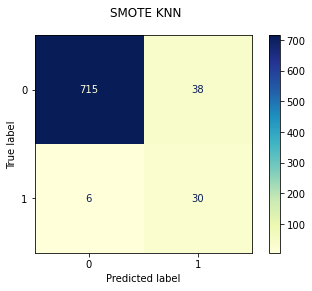

In [100]:
fig, ax = plt.subplots()

fig.suptitle("SMOTE KNN")

plot_confusion_matrix(sm_knn, X_test_sc, y_test, ax=ax, cmap="YlGnBu");

# Conclusion

## Final Model - Weighted KNN

In [101]:
# KNN MODEL (weight = 'distance', n_neighbors = 5)
fig = px.scatter_3d(X_test_sc, x='all_star_app', y='WS', z='FT', color=knn_proba, symbol='MVP', size_max=18, opacity=0.6,\
                    color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

#### We chose the KNN model as it best represented what we were looking for in terms of predictability and showed a high precision metric. 
- This model did a great job in showing why and how NBA players are elected into the HOF based on peer comparison
- The model was weighted by distance to accomodate for class imbalance
- Hall of famers in the model held more voting power than non-HOF for those that might have been otherwise marked non-HOF
- The KNN model functioned somewhat as a microcosm of the peer review and career stat analysis which goes into the real-world HOF consideration process

#### Our best features in determining HOF selection were:
- Win-Share (WS)
- Free Throws (FT)
- All Star Appearances (all_star_app)
- MVP Count (MVP)

#### In the 3D Graph above, you can see how the KNN model clearly demonstrates the ability to identify Hall of Famers.
- As the color of the shapes change (from pale yellow), the probability of being in the HOF increases
- As the shapes change (from circles), the amount of MVP awards won increases
- As most HOF's have similar statistical qualities, they are closer to each other than to the rest of NBA players